data_dir\7_Cheering_Cheering_7_74.jpg


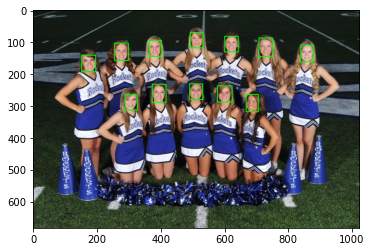

data_dir\7_Cheering_Cheering_7_543.jpg


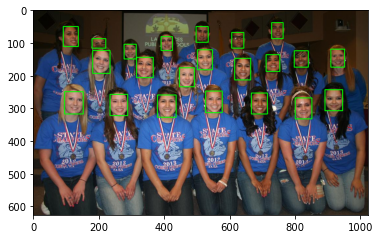

data_dir\7_Cheering_Cheering_7_889.jpg


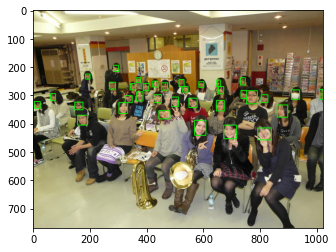

Checking cropped images...
7_Cheering_Cheering_7_74 12


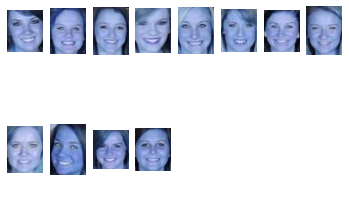

7_Cheering_Cheering_7_543 22


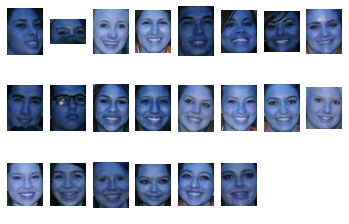

7_Cheering_Cheering_7_889 35


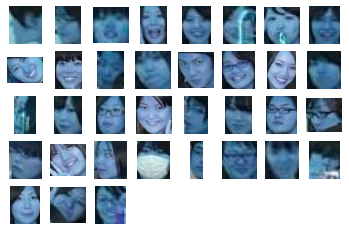

Face Detection using dlib:
7_Cheering_Cheering_7_74.jpg辨識到13張圖片


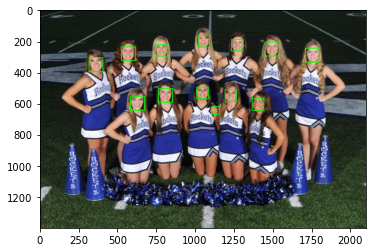

7_Cheering_Cheering_7_543.jpg辨識到21張圖片


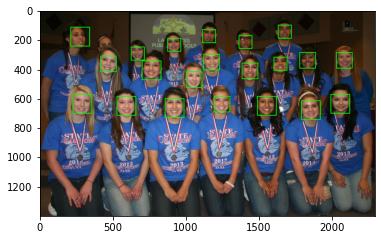

7_Cheering_Cheering_7_889.jpg辨識到15張圖片


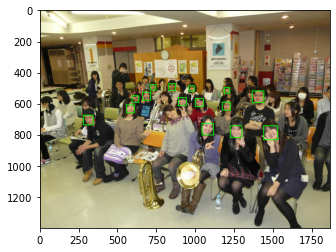

In [1]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
import imutils

#%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
data_dir = 'data_dir'

def draw_bbox():
    for img_name in annotate_dict:
        img_path = os.path.join(data_dir, img_name)
        img=cv2.imread(img_path)
        print(img_path)
        for bbox in annotate_dict[img_name]:
            cv2.rectangle(img, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,255,0), thickness=2)
        img = img[:,:,::-1]
        plt.imshow(img)
        plt.show()    

def save_bbox():
    save_dir = 'save_dir' # Do not change this line
    save_path=os.path.join(save_dir)
    
    for img_name in annotate_dict:
        img_path = os.path.join(data_dir,img_name)
        img_base =cv2.imread(img_path)
        img_base = img_base[:,:,::-1]
        j=0
        for bbox in (annotate_dict[img_name]):        
            file_name=img_name
            file_name=file_name[:-4]
            file_name=file_name+'_'+str(j)+'.jpg'
            j=j+1
            if os.path.exists(save_dir):
                img_crop=img_base[bbox[1]:bbox[3],bbox[0]:bbox[2]]
                cv2.imwrite(os.path.join(save_path ,file_name), img_crop)                
            else :
                os.mkdir(save_dir)    

def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()
def check_bbox():
    save_dir = 'save_dir'
    data_dict = {}
    if not os.path.exists(save_dir):
        print('save_dir is not created!')
        return
    if len(os.listdir(save_dir)) < 10:
        print('cropped faces are not generated!')
        return
    for img_name in annotate_dict:
        img_name = img_name[:-4]
        data_dict[img_name] = []
        for bbox_name in os.listdir(save_dir):
            if img_name in bbox_name:
                bbox_path = os.path.join(save_dir, bbox_name)
                img = cv2.imread(bbox_path)
                data_dict[img_name].append(img[:,:,::-1])
    for img_name in data_dict:
        print(img_name, len(data_dict[img_name]))
        display_img_list(data_dict[img_name])

def test_dlib():
    detector = dlib.get_frontal_face_detector()
    
    for img_name in annotate_dict:
        faces=0
        img_path = os.path.join(data_dir, img_name)
        img=cv2.imread(img_path)
        img = img[:,:,::-1]
        img = imutils.resize(img, height=1400)
        #img=cv2.resize(img,height=1400)
        face_rects  = detector(img, 1) #1這個參數表示向上採樣，幫助我找出更多臉
        
        for det in face_rects:
            x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),4,cv2.LINE_AA)
            faces=faces+1
        print(str(img_name)+'辨識到'+str(faces)+'張圖片')    
        plt.imshow(img)
        plt.show()  
        
    pass
if __name__ == '__main__':
    draw_bbox()
    save_bbox()
    print('Checking cropped images...')  
    check_bbox()
    print('Face Detection using dlib:')
    test_dlib()
    
    
